In [1]:
from ROOT import TCanvas, TFile
from ROOT import TGraph
from ROOT import gStyle
from array import array
import math

c1 = TCanvas( 'c1', 'The Main Canvas', 200, 10, 700, 500 )
c1.SetGridx()
c1.SetGridy()
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderMode(-1 )
c1.GetFrame().SetBorderSize( 5 )

Welcome to JupyROOT 6.16/00


In [2]:
def generator_function(x,par):
    return par[0]+par[1]*x+par[2]*x*x+par[3]*x*x*x

xlow = -4.0
xhigh = 4.0
npoints = 10000

xval = array('d')
yval = array('d')
xroots = array('d')
yroots = array('d')

par = array('d')
par.append(1.80)
par.append(-4.05)
par.append(0.40)
par.append(1.00)

dx = (xhigh-xlow)/npoints

In [3]:
for i in range(0,npoints):
    xval.append(xlow+i*dx)
    yval.append(generator_function(xval[i],par))

In [4]:
nsearch = 1000

niter = npoints/nsearch
ycomp = yval[0]
nroots_found = 0

for i in range(0,int(niter)):
    y = yval[nsearch*i]
    if (y==0):
        print ("Found exact root at x = %f\n" % xval[nsearch*i])
        xroots.append(xval[nsearch*i])
        yroots.append(0.0)
        nroots_found = nroots_found + 1
    if (y*ycomp<0.0):
        xlow = xval[nsearch*(i-1)]
        xhigh = xval[nsearch*i]
        epsilon = 1.0E-10
        diff = 1.0E12
        while (diff>epsilon):
            fa = generator_function(xlow,par)
            fb = generator_function(xhigh,par)
            xmid = (xhigh+xlow)/2.0
            fc = generator_function(xmid,par)
            product = fa*fc
            if (product < 0):
                xhigh = xmid
                fb = fc
            else:
                xlow = xmid
                fa = fc

            diff = math.fabs(fc)

        print ("Found root at x = %f\n" % xmid)
        xroots.append(xmid)
        yroots.append(0.0)
        nroots_found = nroots_found + 1
        ycomp = y
    else:
        ycomp = y

print ("Total number of roots found = %d\n" % nroots_found)

Found exact root at x = -2.400000

Found root at x = 0.500000

Found root at x = 1.500000

Total number of roots found = 3



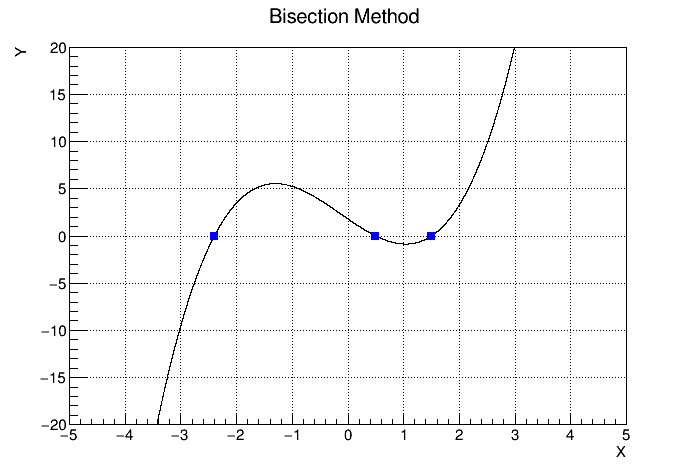

In [5]:
gr = TGraph(npoints,xval,yval)
gr2 = TGraph(nroots_found,xroots,yroots)

gr2.SetMarkerColor(4)
gr.SetMarkerStyle(21)
gr2.SetMarkerStyle(21)
gr.SetMaximum(20.0)
gr.SetMinimum(-20.0)
gr.GetXaxis().SetLimits(-5.0,5.0)
gr.SetTitle("Bisection Method")
gr.GetXaxis().SetTitle("X")
gr.GetYaxis().SetTitle("Y")
gr.Draw("AL")
gr2.Draw("P")

c1.Draw()
